In [1]:
%matplotlib inline

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

os.chdir('/home/esther/Desktop/BehavioralTraining/code')

from preprocessingFunctions import loadData
from preprocessingFunctions import preProcessChoices
from preprocessingFunctions import preProcessReactionTimes
from preprocessingFunctions import makeSideChoices
from preprocessingFunctions import removeCancelledTrials

from strategyFunctions import simulateStrategies

from scoringFunctions import manualScoring
from scoringFunctions import calcScoresPerDay
from scoringFunctions import scorePerPhase
from scoringFunctions import scoreStrategy
from scoringFunctions import scoreChoicesUnfiltered
from scoringFunctions import calcNormStratScores

from plottingFunctions import plotIt

In [3]:
os.chdir('/home/esther/Desktop/BehavioralTraining')

In [4]:
#%% load data
Adat,Mdat = loadData()

## Manual Scoring

In [5]:
manualScores = manualScoring(Mdat)

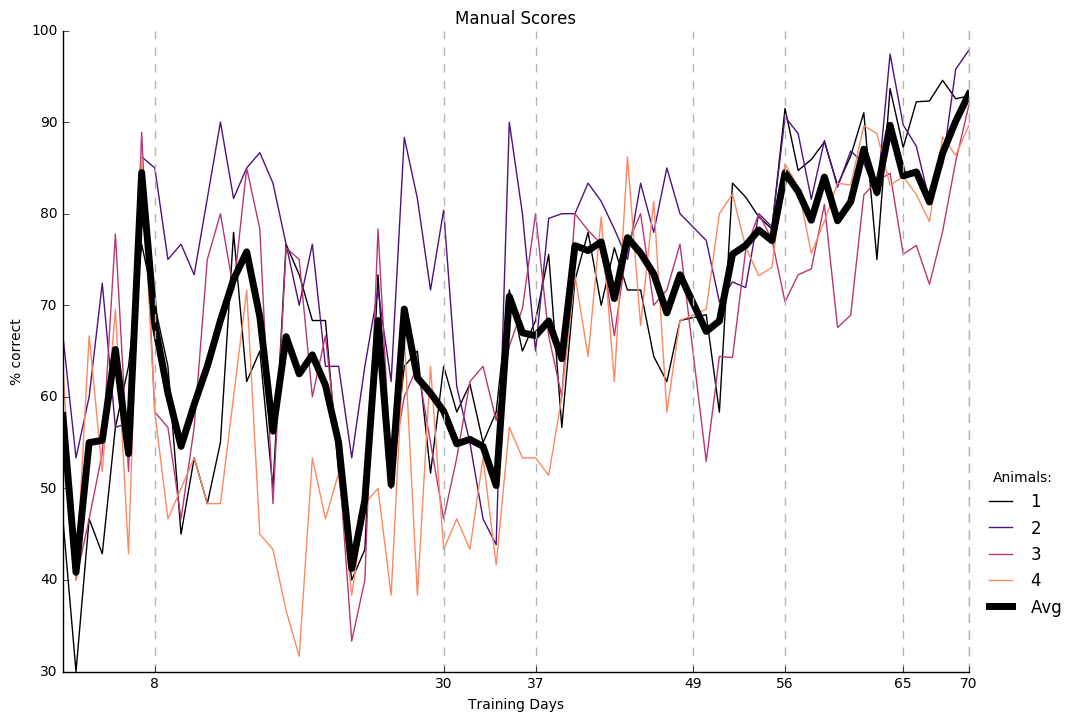

In [6]:
plotIt(manualScores, title = "Manual Scores", ylabel = "% correct", Phase = False, Norm = False)

### just a little experiment if it's possible to average over every n days..

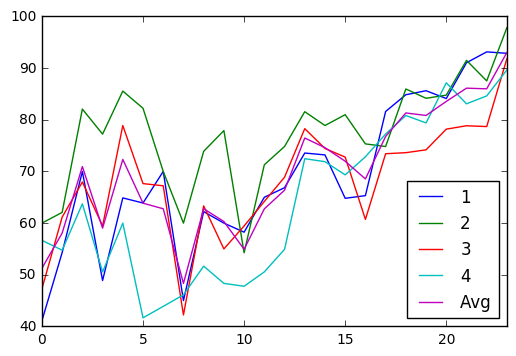

In [26]:
manscores = manualScores.reset_index(drop = True)
ms = manscores.groupby(manscores.index / 3).mean()
ms.plot()

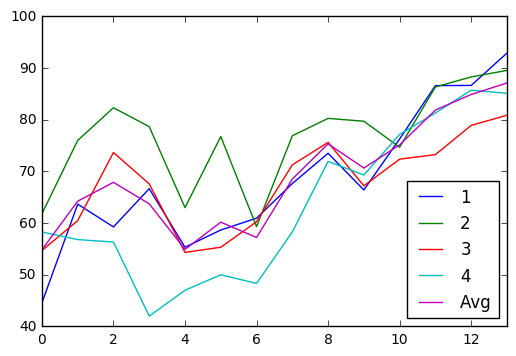

In [27]:
ms = manscores.groupby(manscores.index / 5).mean()
ms.plot()

## Scoring based on rewards given (threshold varies per phase)

I'll compare the different thresholds for amount of treats given to count as a correct trial, and the phase in which the threshold was valid. 

** When the threshold for a correct trial consists of > 3 rewards (additional reward + sensor triggered reward) for phase 1, and >2 rewards for all phases after that.  **

In [5]:
Scores = scorePerPhase(Adat,Mdat,  {'r': 3, 'p': 1})

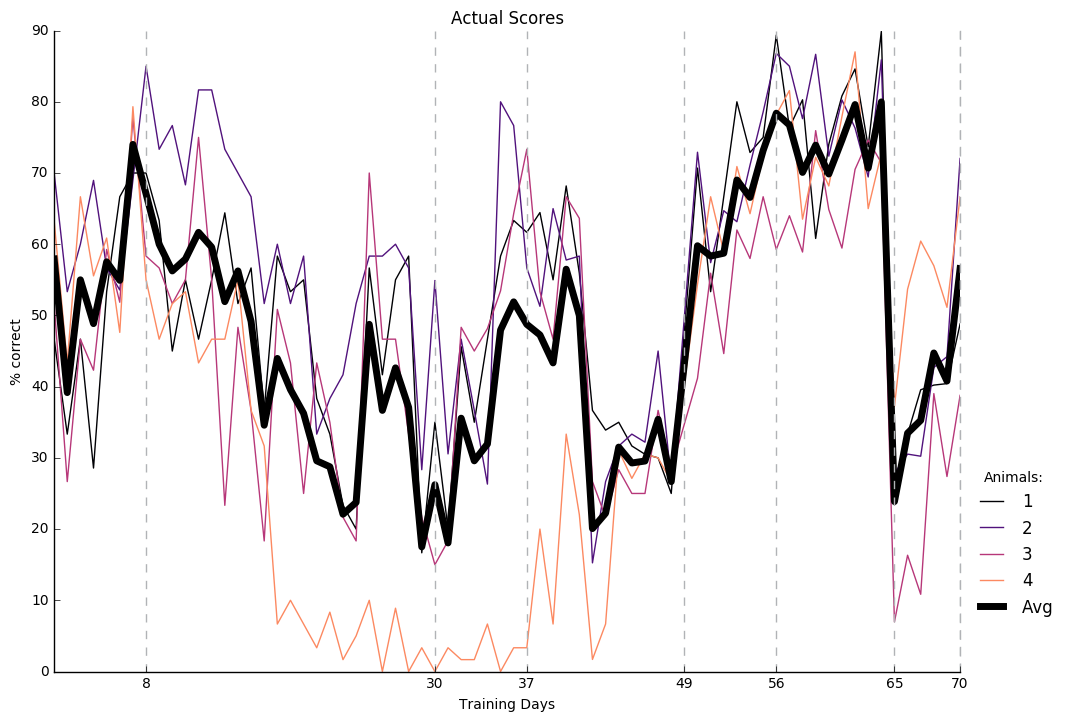

In [6]:
plotIt(Scores, title = "Actual Scores", ylabel = "% correct", Phase = False, Norm = False)

** When the threshold for a correct trial consists of > 2 awards for phase 1, and > 1 award for phases after that.**

*This is fairly accurate of the actual situations since in the first phase often 3 or more treats were given for a correct trial, but this changed to 2 in phase 2 and beyond.* 

In [30]:
rewardScores = scorePerPhase(Adat,Mdat,  {'r': 2, 'p': 1})

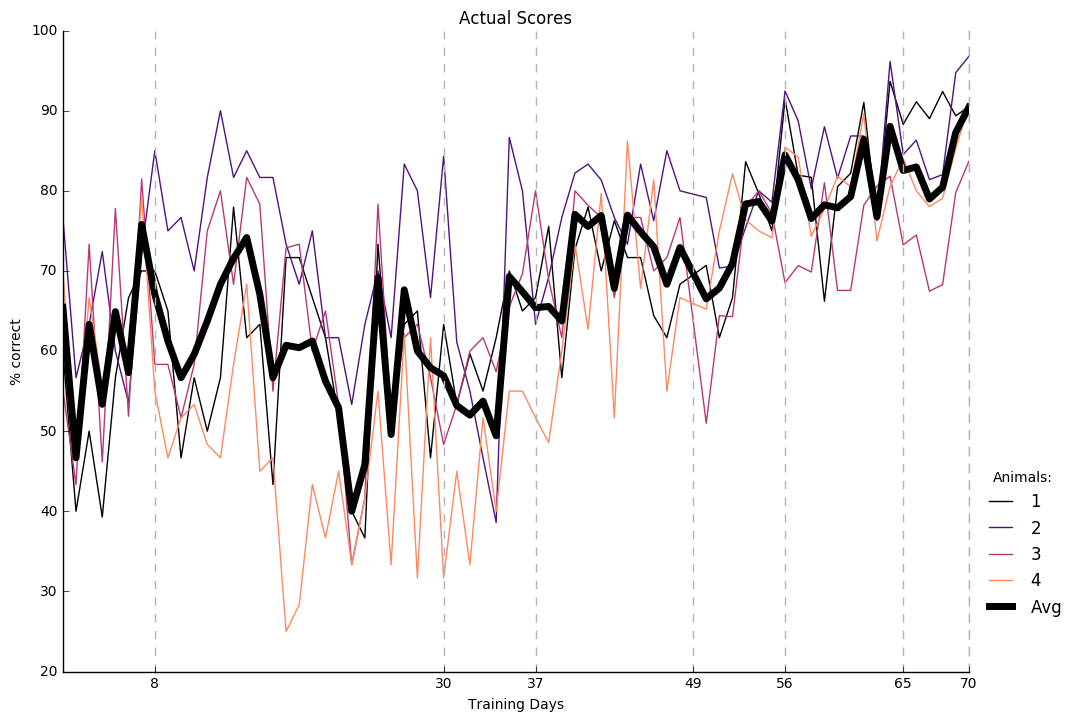

In [15]:
plotIt(rewardScores, title = "Actual Scores", ylabel = "% correct", Phase = False, Norm = False)

** Same as above but this time the reward threshold was > 2 for phases 1 and 2, and >1 for the remaining phases **

In [11]:
Scores = scorePerPhase(Adat,Mdat,  {'r': 2, 'p': 2})

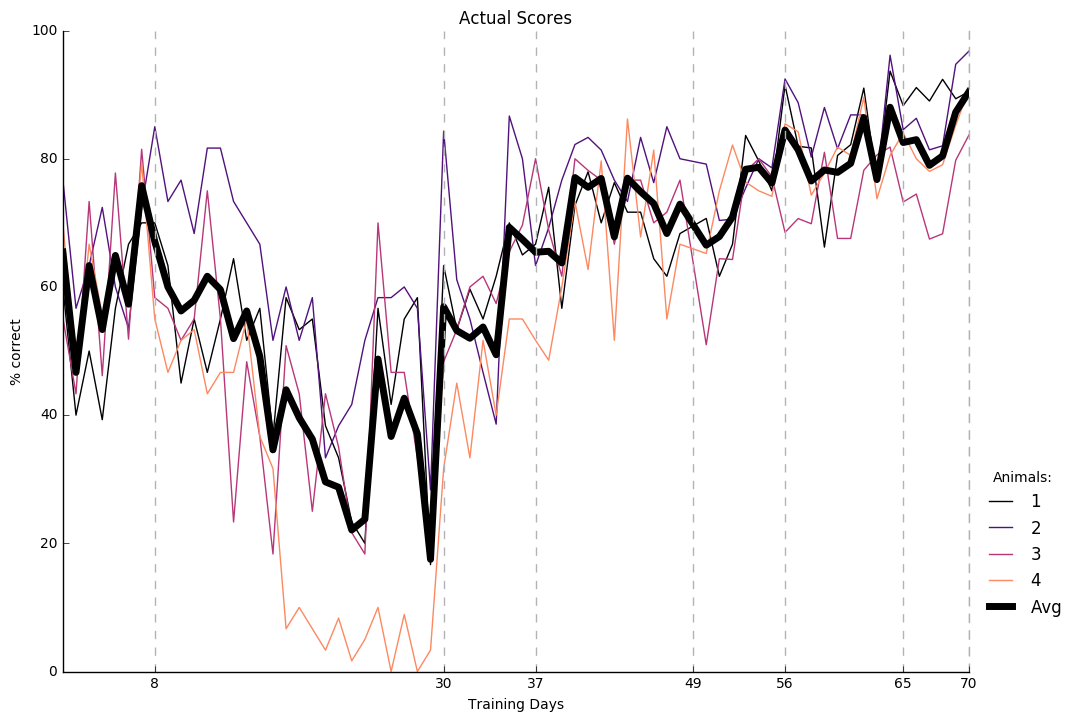

In [12]:
plotIt(Scores, title = "Actual Scores", ylabel = "% correct", Phase = False, Norm = False)

** Same as above but this time the threshold was > 2 for phases 1,2, and 3 and >1 for the remaining phases **

In [13]:
Scores = scorePerPhase(Adat,Mdat,  {'r': 2, 'p': 3})

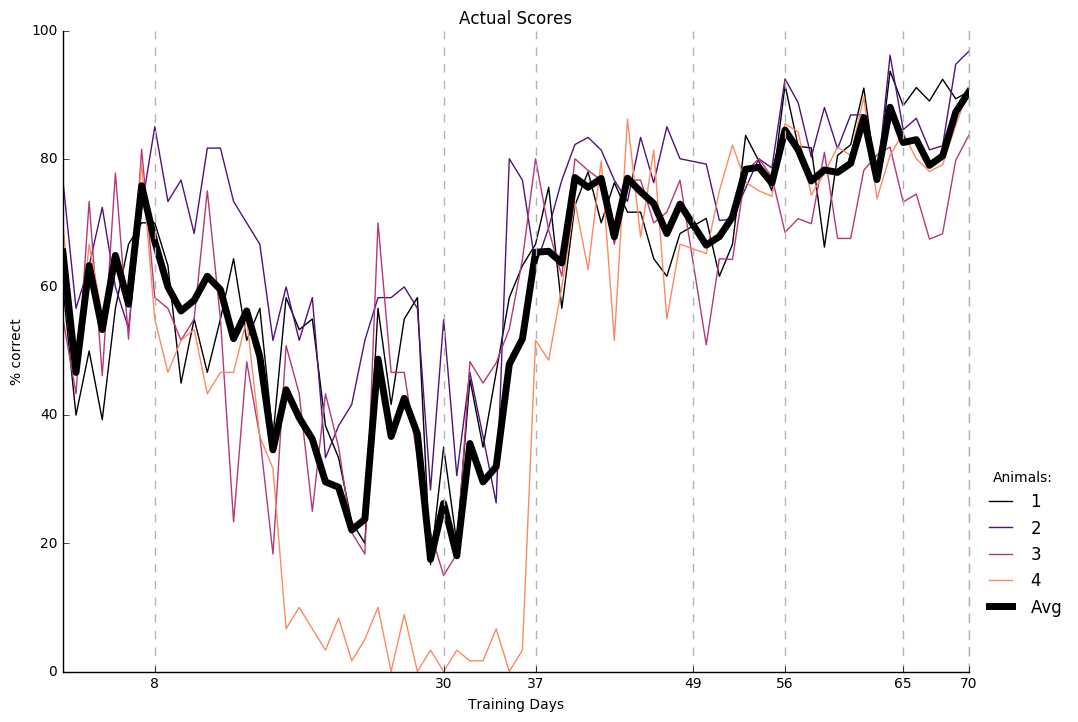

In [14]:
plotIt(Scores, title = "Actual Scores", ylabel = "% correct", Phase = False, Norm = False)

** Same as above but this time the threshold was > 2 for phases 1,2, 3 and 4 and >1 for the remaining phases **

In [15]:
Scores = scorePerPhase(Adat,Mdat,  {'r': 2, 'p': 4})

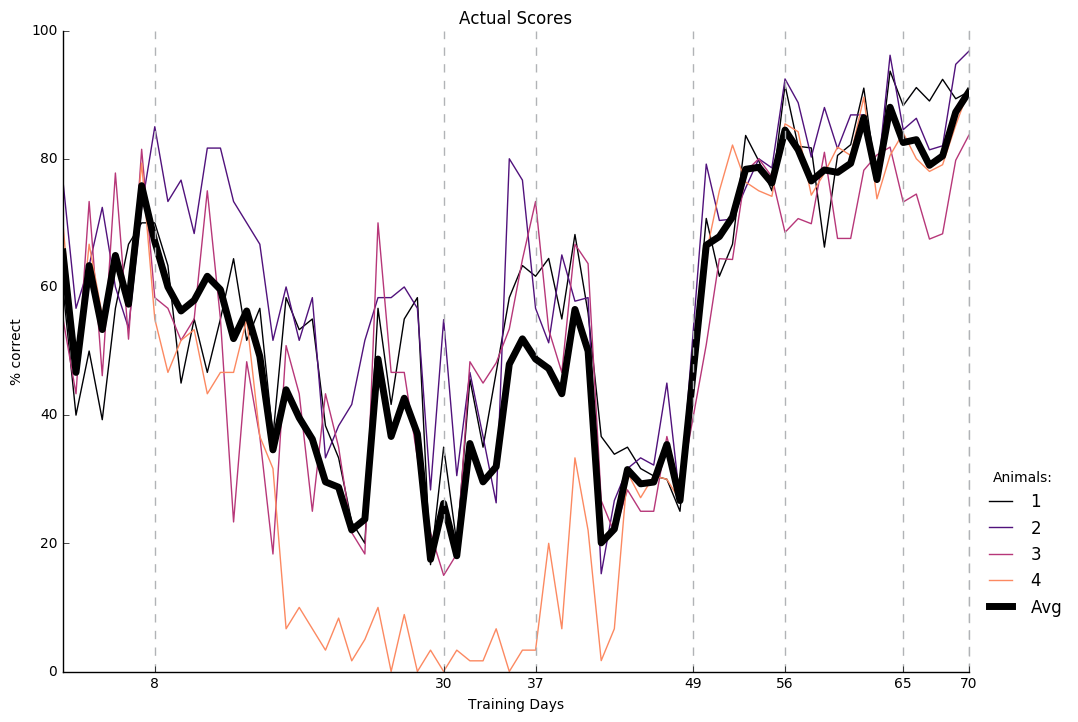

In [16]:
plotIt(Scores, title = "Actual Scores", ylabel = "% correct", Phase = False, Norm = False)

** When the threshold for a correct trial consists of > 3 rewards (additional reward + sensor triggered reward) for phase 1 and 2, and >2 rewards for all phases after that. ** 

In [17]:
Scores = scorePerPhase(Adat,Mdat,  {'r': 3, 'p': 2})

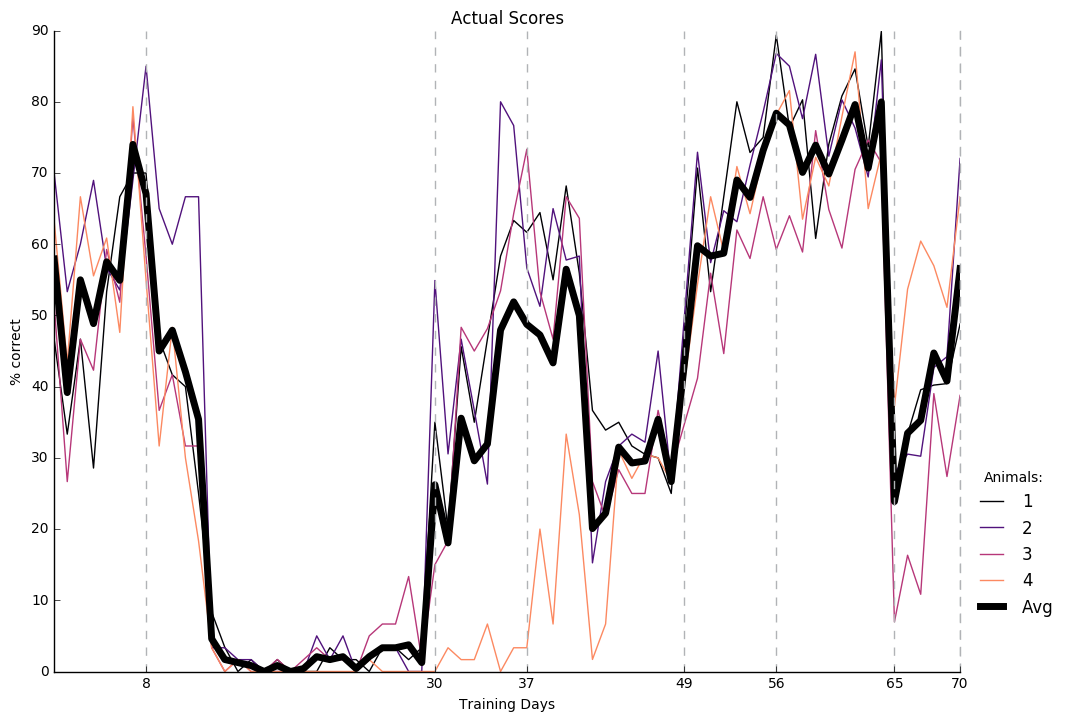

In [18]:
plotIt(Scores, title = "Actual Scores", ylabel = "% correct", Phase = False, Norm = False)

** When the threshold for a correct trial consists of > 3 rewards (additional reward + sensor triggered reward) for phase 1,2 and 3, and >2 rewards for all phases after that.**  

In [19]:
Scores = scorePerPhase(Adat,Mdat,  {'r': 3, 'p': 3})

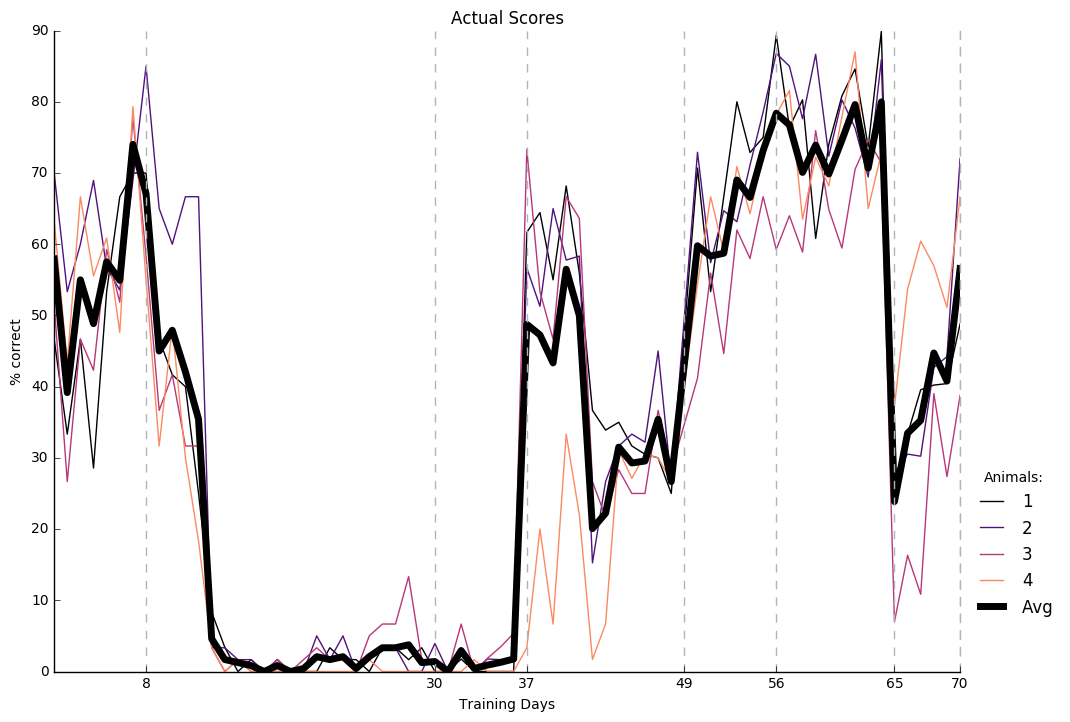

In [20]:
plotIt(Scores, title = "Actual Scores", ylabel = "% correct", Phase = False, Norm = False)

## Scoring based on sensors

In the first two phases in particular (to some degree still in phase 3 and 4 as well) the sensors did not always pick up a correct choice reliably. Often the rat's tail or body would activate the sensors while the rat was still at the nose poke, or when it started turning towards one of the areas. In these phases the researcher watched the rat carefully and rewarded based on his movement in the correct direction, regardless of sensor readings. 

In [36]:
choices,sides = preProcessChoices(Adat,Mdat)

In [35]:
correct, incorrect, nTotalTrials  = scoreChoicesUnfiltered(choices, sides)

In [37]:
sensorScores = calcScoresPerDay(correct, nTotalTrials)

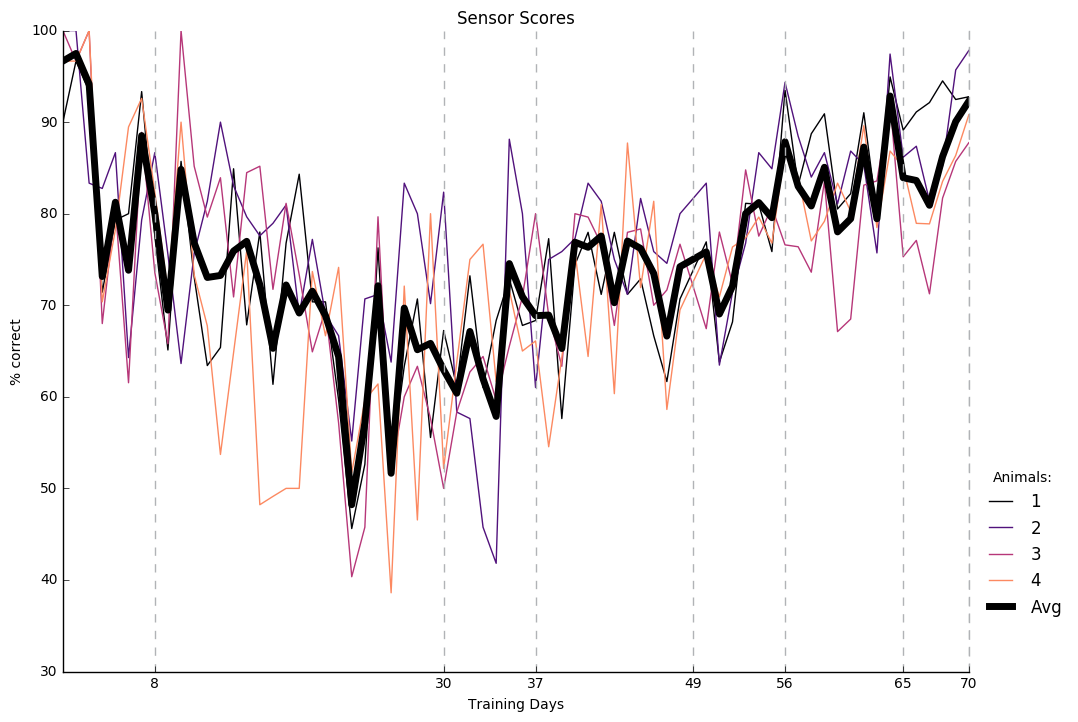

In [18]:
plotIt(sensorScores, title = "Sensor Scores", ylabel = "% correct", Phase = False, Norm = False)

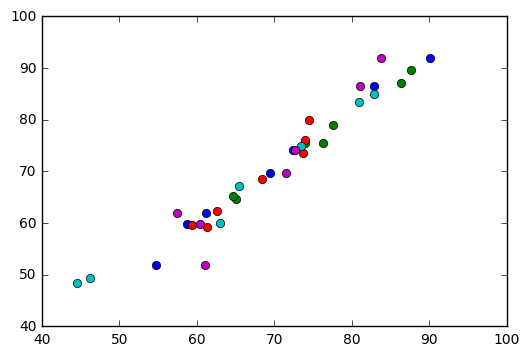

In [16]:
plt.plot(rewardScores.groupby(level = "Phase").mean(),manualScores.groupby(level = "Phase").mean(), marker='o', linestyle='', ms=6)

In [20]:
def compareScoringMethodsScatter(method1,method2, method1name = "RewardScores", method2name = "ManualScores", phases = range(5,8)):    

    f, ax = plt.subplots()    
    #ax = axs.ravel()
    
    for phase in phases:
        

        ax.plot(method1.loc[phase].mean(),method2.loc[phase].mean(), marker='o', linestyle='', ms=6, label= "Phase " + str(phase))
 
       
        ax.legend(numpoints = 1, loc = 4, fontsize = 9)
        ax.set(xlim=(0,100), ylim=(0,100))
        ax.set_xlabel("% of correct trials " + method1name)
        ax.set_ylabel("% of correct trials " + method2name)
        ax.set_title(method1name + " Plotted Against " + method2name)
        ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
        

### Reward Scores Compared With Manual Scores

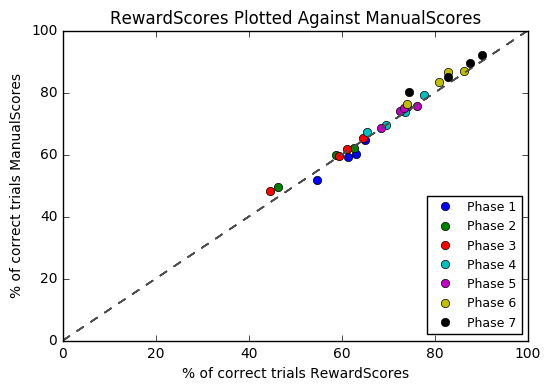

In [21]:
compareScoringMethodsScatter(rewardScores.ix[:,0:4],manualScores, method1name = "RewardScores", method2name = "ManualScores", phases = range(1,8))

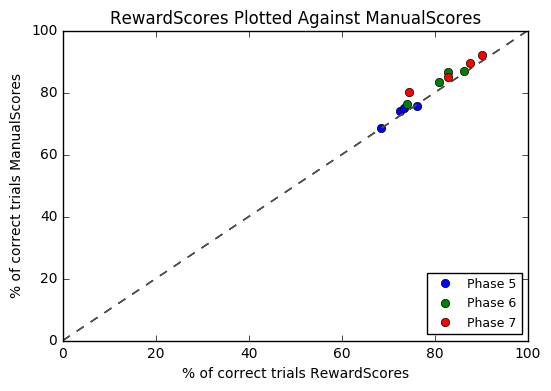

In [15]:
compareScoringMethodsScatter(rewardScores.ix[5:7,0:4],manualScores, method1name = "RewardScores", method2name = "ManualScores")

In [28]:
rewardScores.ix[:,0:4]

Animal             1          2          3          4
Phase Day                                            
1     1    60.000000  76.666667  55.172414  70.000000
      2    40.000000  56.666667  43.333333  46.666667
      3    50.000000  63.333333  73.333333  66.666667
      4    39.285714  72.413793  46.153846  55.555556
      5    56.666667  60.000000  77.777778  65.217391
      6    66.666667  53.571429  51.851852  57.142857
      7    70.000000  72.413793  81.481481  79.310345
2     1    70.000000  85.000000  58.333333  55.000000
      2    65.000000  75.000000  58.333333  46.666667
      3    46.666667  76.666667  51.666667  51.666667
      4    56.666667  70.000000  58.333333  53.333333
      5    50.000000  81.666667  75.000000  48.333333
      6    56.666667  90.000000  80.000000  46.666667
      7    77.966102  81.666667  68.333333  58.333333
      8    61.666667  85.000000  81.666667  68.333333
      9    63.333333  81.666667  78.333333  45.000000
      10   43.333333  81.666667  55.000000  46.666667
      11   71.666667  73.333333  72.881356  25.000000
      12   71.666667  68.333333  73.333333  28.333333
      13   66.666667  75.000000  60.000000  43.333333
      14   61.666667  61.666667  65.000000  36.666667
      15   51.666667  61.666667  53.333333  45.000000
      16   40.000000  53.333333  33.333333  33.333333
      17   36.666667  63.333333  41.666667  41.666667
      18   73.333333  70.000000  78.333333  55.000000
      19   51.666667  61.666667  51.666667  33.333333
      20   63.333333  83.333333  61.666667  62.222222
      21   65.000000  80.000000  63.333333  31.666667
      22   46.666667  66.666667  56.666667  61.666667
3     1    63.333333  84.313725  48.333333  31.666667
...              ...        ...        ...        ...
4     5    77.966102  83.333333  78.181818  62.711864
      6    70.000000  81.355932  76.666667  79.661017
      7    76.271186  76.666667  66.666667  51.666667
      8    71.666667  73.333333  76.666667  86.206897
      9    71.666667  83.333333  76.666667  67.796610
      10   64.406780  76.271186  70.000000  81.355932
      11   61.666667  85.000000  71.666667  55.000000
      12   68.333333  80.000000  76.666667  66.666667
5     1    69.511494  79.583333  63.823529  65.942029
      2    70.689655  79.166667  50.980392  65.217391
      3    61.666667  70.370370  64.406780  75.000000
      4    66.666667  70.588235  64.285714  82.142857
      5    83.636364  75.438596  78.000000  76.363636
      6    79.661017  80.000000  80.000000  75.000000
      7    75.000000  78.571429  77.192982  74.137931
6     1    91.489362  92.452830  68.518519  85.454545
      2    81.944444  88.750000  70.666667  84.210526
      3    81.690141  80.263158  69.863014  74.324324
      4    66.216216  88.000000  81.012658  77.777778
      5    80.519481  81.578947  67.567568  81.818182
      6    82.191781  86.842105  67.567568  80.519481
      7    91.025641  86.842105  78.205128  89.610390
      8    76.315789  76.388889  80.597015  73.750000
      9    93.670886  96.153846  81.818182  80.519481
7     1    88.297872  84.536082  73.255814  84.042553
      2    91.111111  86.315789  74.489796  80.000000
      3    89.010989  81.395349  67.469880  78.021978
      4    92.391304  82.022472  68.292683  79.069767
      5    89.361702  94.736842  79.761905  85.227273
      6    90.476190  96.774194  83.673469  90.804598

[70 rows x 4 columns]

In [23]:
manualScores

1          2          3          4
Phase Day                                            
1     1    46.666667  66.666667  55.172414  63.333333
      2    30.000000  53.333333  40.000000  40.000000
      3    46.666667  60.000000  46.666667  66.666667
      4    42.857143  72.413793  53.846154  51.851852
      5    56.666667  56.666667  77.777778  69.565217
      6    63.333333  57.142857  51.851852  42.857143
      7    76.666667  86.206897  88.888889  86.206897
2     1    70.000000  85.000000  58.333333  58.333333
      2    63.333333  75.000000  56.666667  46.666667
      3    45.000000  76.666667  46.666667  50.000000
      4    53.333333  73.333333  56.666667  53.333333
      5    48.333333  81.666667  75.000000  48.333333
      6    55.000000  90.000000  80.000000  48.333333
      7    77.966102  81.666667  71.666667  60.000000
      8    61.666667  85.000000  85.000000  71.666667
      9    65.000000  86.666667  78.333333  45.000000
      10   50.000000  83.333333  48.333333  43.333333
      11   76.666667  76.666667  76.271186  36.666667
      12   73.333333  70.000000  75.000000  31.666667
      13   68.333333  76.666667  60.000000  53.333333
      14   68.333333  63.333333  66.666667  46.666667
      15   51.666667  63.333333  53.333333  51.666667
      16   40.000000  53.333333  33.333333  38.333333
      17   43.333333  63.333333  40.000000  48.333333
      18   73.333333  71.666667  78.333333  50.000000
      19   50.000000  61.666667  51.666667  38.333333
      20   63.333333  88.333333  60.000000  66.666667
      21   65.000000  81.666667  63.333333  38.333333
      22   51.666667  71.666667  55.000000  63.333333
3     1    63.333333  80.392157  46.666667  43.333333
...              ...        ...        ...        ...
4     5    77.966102  83.333333  78.181818  64.406780
      6    70.000000  81.355932  76.666667  79.661017
      7    76.271186  78.333333  66.666667  61.666667
      8    71.666667  75.000000  76.666667  86.206897
      9    71.666667  83.333333  80.000000  67.796610
      10   64.406780  77.966102  70.000000  81.355932
      11   61.666667  85.000000  71.666667  58.333333
      12   68.333333  80.000000  76.666667  68.333333
5     1    68.649425  78.541667  64.803922  68.949275
      2    68.965517  77.083333  52.941176  69.565217
      3    58.333333  70.370370  64.406780  80.000000
      4    83.333333  72.549020  64.285714  82.142857
      5    81.818182  71.929825  76.000000  76.363636
      6    79.661017  80.000000  80.000000  73.214286
      7    78.333333  78.571429  77.192982  74.137931
6     1    91.489362  90.566038  70.370370  85.454545
      2    84.722222  88.750000  73.333333  82.894737
      3    85.915493  81.578947  73.972603  75.675676
      4    87.837838  88.000000  81.012658  79.166667
      5    83.116883  82.894737  67.567568  83.333333
      6    86.301370  86.842105  68.918919  83.116883
      7    91.025641  85.526316  82.051282  89.610390
      8    75.000000  81.944444  83.582090  88.750000
      9    93.670886  97.435897  84.415584  83.116883
7     1    87.234043  89.690722  75.581395  84.042553
      2    92.222222  87.368421  76.530612  82.105263
      3    92.307692  81.395349  72.289157  79.120879
      4    94.565217  85.393258  78.048780  88.372093
      5    92.553191  95.789474  85.714286  86.363636
      6    92.857143  97.849462  91.836735  89.655172

[70 rows x 4 columns]

### Sensor Scores Compared to Manual Scores

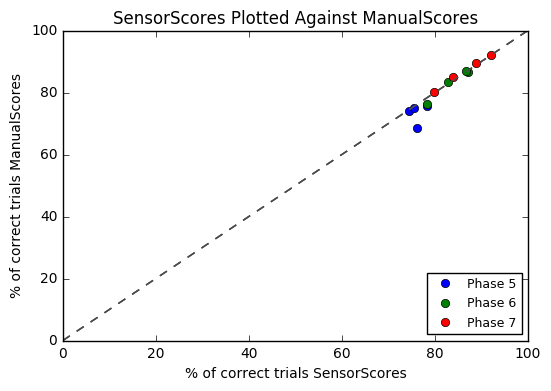

In [16]:
compareScoringMethodsScatter(sensorScores.ix[5:7,0:4],manualScores, method1name = "SensorScores", method2name = "ManualScores")

### Sensor Scores Against Reward Scores

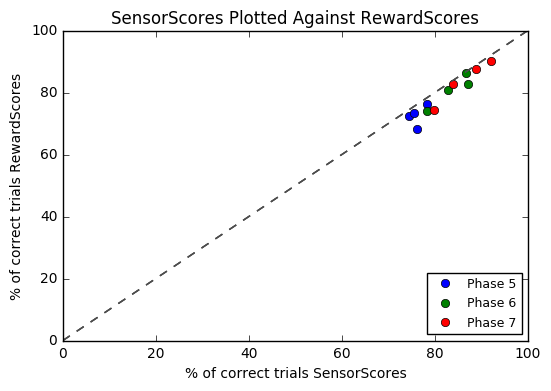

In [19]:
compareScoringMethodsScatter(sensorScores.ix[5:7,0:4],rewardScores.ix[:,0:4], method1name = "SensorScores", method2name = "RewardScores")

## Seperate Cue Training and Full Task Performance

### Cue Training

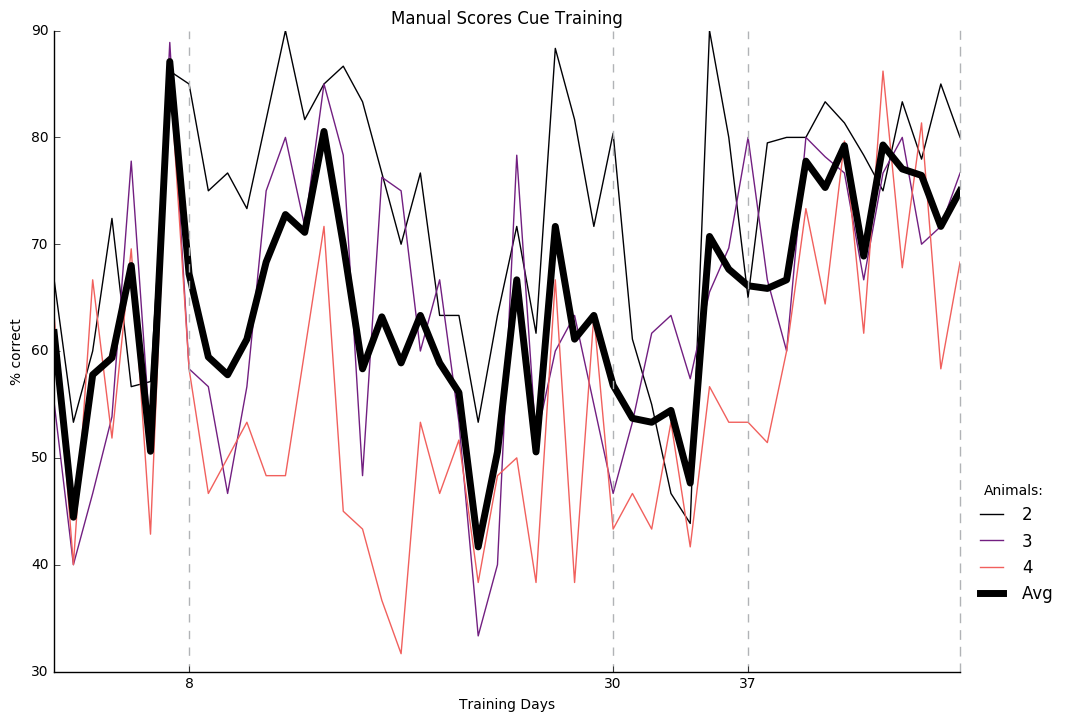

In [32]:
plotIt(manualScores.ix[1:4,1:4], title = "Manual Scores Cue Training", ylabel = "% correct", Phase = False, Norm = False)

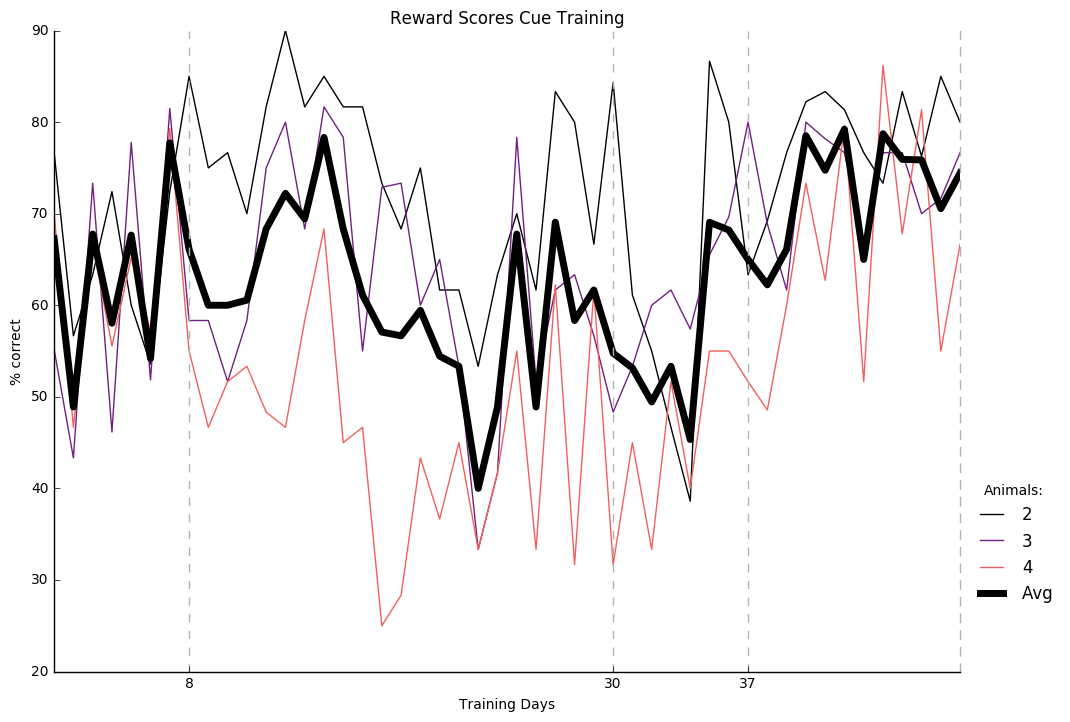

In [31]:
plotIt(rewardScores.ix[1:4,1:4], title = "Reward Scores Cue Training", ylabel = "% correct", Phase = False, Norm = False)

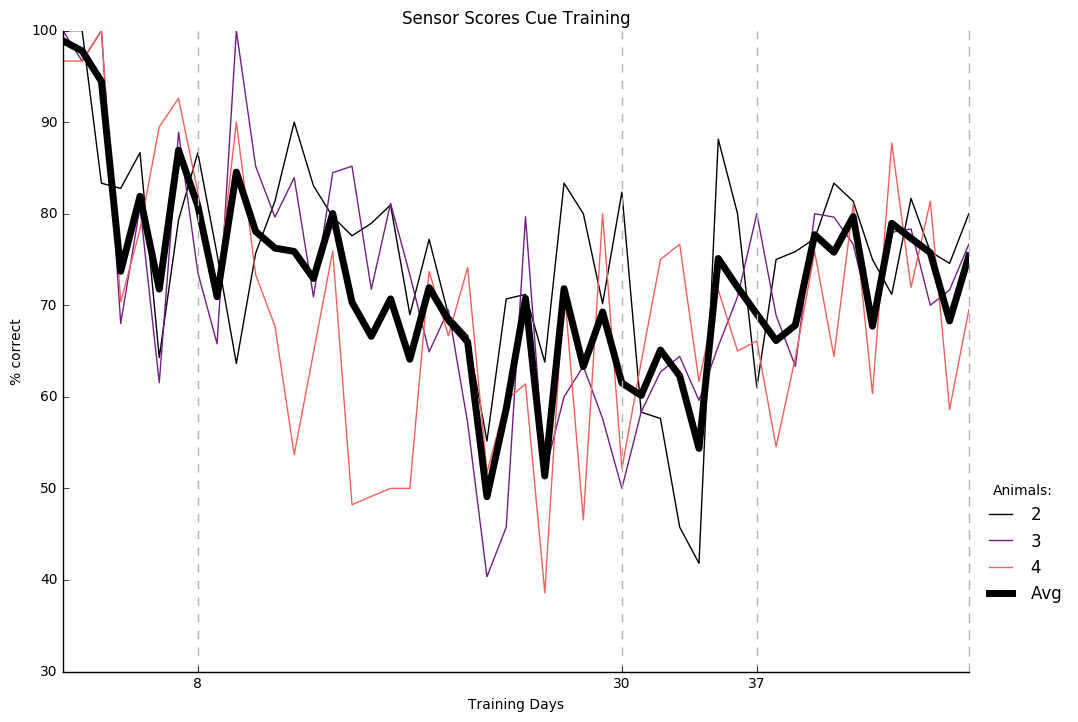

In [38]:
plotIt(sensorScores.ix[1:4,1:4], title = "Sensor Scores Cue Training", ylabel = "% correct", Phase = False, Norm = False)

### Full Task

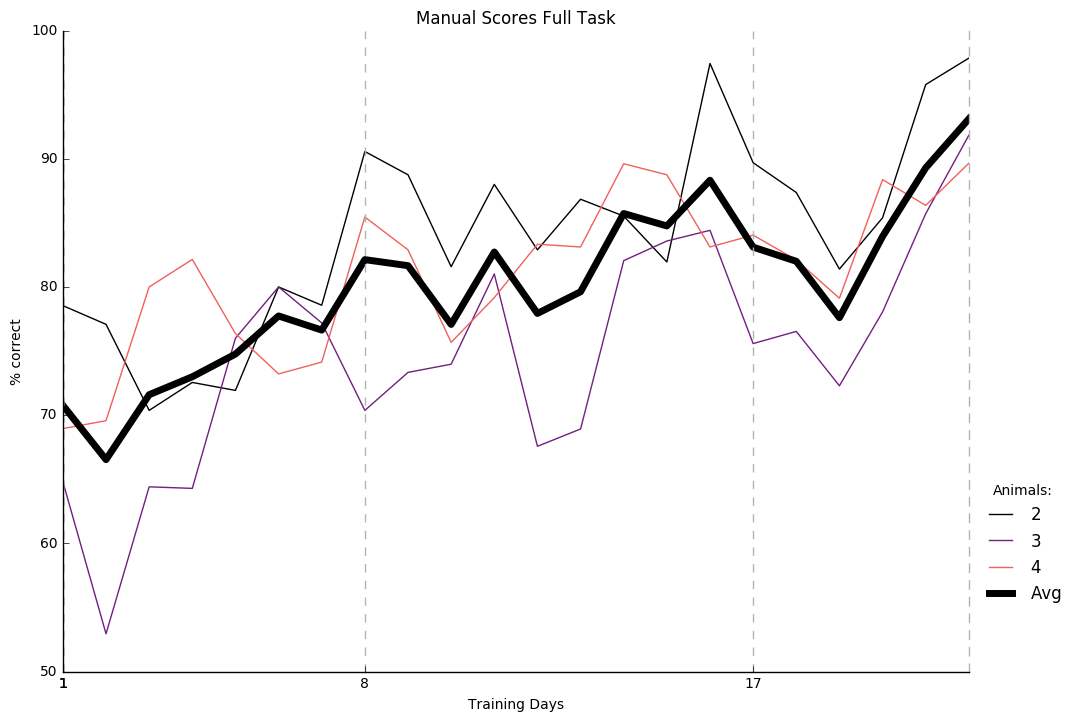

In [40]:
plotIt(manualScores.ix[5:7,1:4], title = "Manual Scores Full Task", ylabel = "% correct", Phase = False, Norm = False)

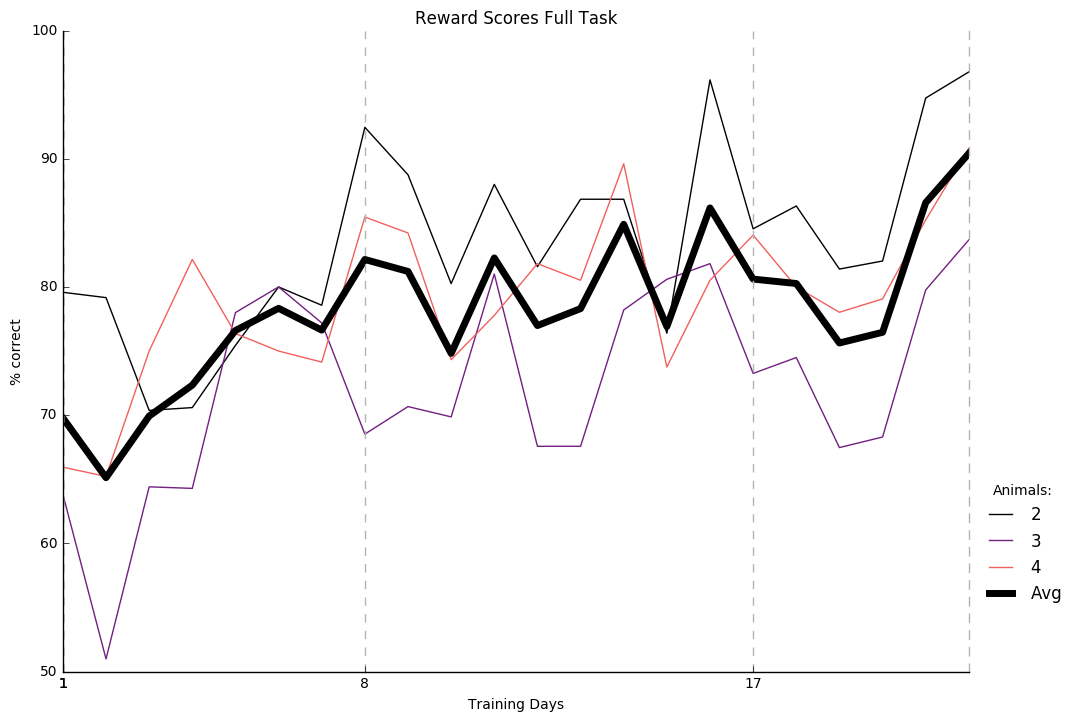

In [41]:
plotIt(rewardScores.ix[5:7,1:4], title = "Reward Scores Full Task", ylabel = "% correct", Phase = False, Norm = False)

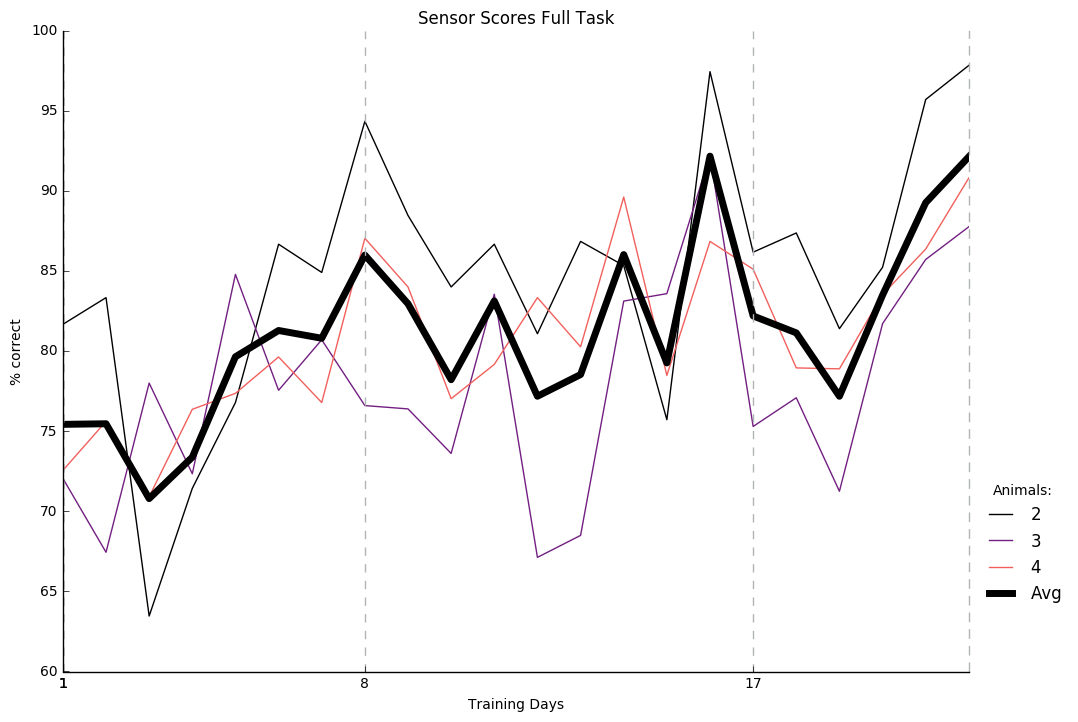

In [42]:
plotIt(sensorScores.ix[5:7,1:4], title = "Sensor Scores Full Task", ylabel = "% correct", Phase = False, Norm = False)